In [11]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from metpy.plots import USCOUNTIES
import geopandas
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime, date
from dateutil import tz
import glob

%matplotlib inline

In [12]:
hazards = geopandas.read_file('data/current_hazards.shp')
hazards

,CAP_ID,VTEC,PHENOM,SIG,WFO,EVENT,ISSUANCE,EXPIRATION,ONSET,ENDS,URL,MSG_TYPE,PROD_TYPE,geometry
0,NWS-IDP-PROD-4785613-3857804,/O.NEW.KILM.FA.Y.0001.210212T2024Z-210212T2330Z/,FA,Y,KILM,0001,2021-02-12T15:24:00-05:00,2021-02-12T18:30:00-05:00,2021-02-12T15:24:00-05:00,2021-02-12T18:30:00-05:00,https://alerts-v2.weather.gov/#/?id=NWS-IDP-PR...,FLS,Flood Advisory,"POLYGON ((-78.54000 33.86000, -78.57000 34.050..."
1,NWS-IDP-PROD-4785592-3857768,/O.EXT.KDDC.WS.A.0002.210214T0300Z-210215T0000Z/,WS,A,KDDC,0002,2021-02-12T14:21:00-06:00,2021-02-13T04:15:00-06:00,2021-02-13T21:00:00-06:00,2021-02-14T18:00:00-06:00,https://alerts-v2.weather.gov/#/?id=NWS-IDP-PR...,WSW,Winter Storm Watch,"POLYGON ((-101.55640 37.38851, -101.55669 37.3..."
2,NWS-IDP-PROD-4785592-3857768,/O.EXT.KDDC.WS.A.0002.210214T0300Z-210215T0000Z/,WS,A,KDDC,0002,2021-02-12T14:21:00-06:00,2021-02-13T04:15:00-06:00,2021-02-13T21:00:00-06:00,2021-02-14T18:00:00-06:00,https://alerts-v2.weather.gov/#/?id=NWS-IDP-PR...,WSW,Winter Storm Watch,"POLYGON ((-101.52720 37.73621, -101.52710 37.7..."
3,NWS-IDP-PROD-4785592-3857768,/O.EXT.KDDC.WS.A.0002.210214T0300Z-210215T0000Z/,WS,A,KDDC,0002,2021-02-12T14:21:00-06:00,2021-02-13T04:15:00-06:00,2021-02-13T21:00:00-06:00,2021-02-14T18:00:00-06:00,https://alerts-v2.weather.gov/#/?id=NWS-IDP-PR...,WSW,Winter Storm Watch,"POLYGON ((-101.08920 37.38771, -101.07760 37.3..."
4,NWS-IDP-PROD-4785592-3857767,/O.EXB.KDDC.WC.Y.0001.210213T0600Z-210214T0300Z/,WC,Y,KDDC,0001,2021-02-12T14:21:00-06:00,2021-02-13T04:15:00-06:00,2021-02-13T00:00:00-06:00,2021-02-13T21:00:00-06:00,https://alerts-v2.weather.gov/#/?id=NWS-IDP-PR...,WSW,Wind Chill Advisory,"POLYGON ((-101.55640 37.38851, -101.55669 37.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312,NWS-IDP-PROD-4781291-3855594,/O.NEW.PAFC.UP.W.5694.210211T1200Z-210213T0200Z/,UP,W,PAFC,5694,2021-02-11T03:55:00-09:00,2021-02-11T17:15:00-09:00,2021-02-11T03:00:00-09:00,2021-02-12T17:00:00-09:00,https://alerts-v2.weather.gov/#/?id=NWS-IDP-PR...,CWF,Heavy Freezing Spray Warning,"MULTIPOLYGON (((-169.00000 62.00000, -169.0000..."
2313,NWS-IDP-PROD-4781285-3855586,/O.NEW.PAFC.SC.Y.5681.210211T1200Z-210213T0200Z/,SC,Y,PAFC,5681,2021-02-11T03:55:00-09:00,2021-02-11T17:15:00-09:00,2021-02-11T03:00:00-09:00,2021-02-12T17:00:00-09:00,https://alerts-v2.weather.gov/#/?id=NWS-IDP-PR...,CWF,Small Craft Advisory,"POLYGON ((-164.78236 54.40087, -164.56537 54.2..."
2314,NWS-IDP-PROD-4781292-3855595,/O.NEW.PAFC.SC.Y.5682.210211T1200Z-210213T0200Z/,SC,Y,PAFC,5682,2021-02-11T03:55:00-09:00,2021-02-11T17:15:00-09:00,2021-02-11T03:00:00-09:00,2021-02-12T17:00:00-09:00,https://alerts-v2.weather.gov/#/?id=NWS-IDP-PR...,CWF,Small Craft Advisory,"POLYGON ((-170.00000 54.20000, -169.35026 52.9..."
2315,NWS-IDP-PROD-4781268-3855573,/O.NEW.PAFC.GL.W.8310.210211T1200Z-210213T0200Z/,GL,W,PAFC,8310,2021-02-11T03:45:00-09:00,2021-02-11T16:45:00-09:00,2021-02-11T03:00:00-09:00,2021-02-12T17:00:00-09:00,https://alerts-v2.weather.gov/#/?id=NWS-IDP-PR...,CWF,Gale Warning,"POLYGON ((-153.32501 58.85384, -153.31894 58.8..."


In [3]:
# Set Coordinate Reference System for the map
map_crs = ccrs.Mercator()

# Set Coordinate Reference System from the Shapefile Data
data_crs = ccrs.PlateCarree()

In [4]:
# Set colors
warning_cmap = {'Flash Flood Watch': '#2E8B57',
                'Flood Watch': '#2E8B57',}

# Generate legend patches
legend_patches = []
for wwa in warning_cmap.keys():
   patch = mpatches.Patch(color=warning_cmap[wwa], label=wwa)
   legend_patches.append(patch)

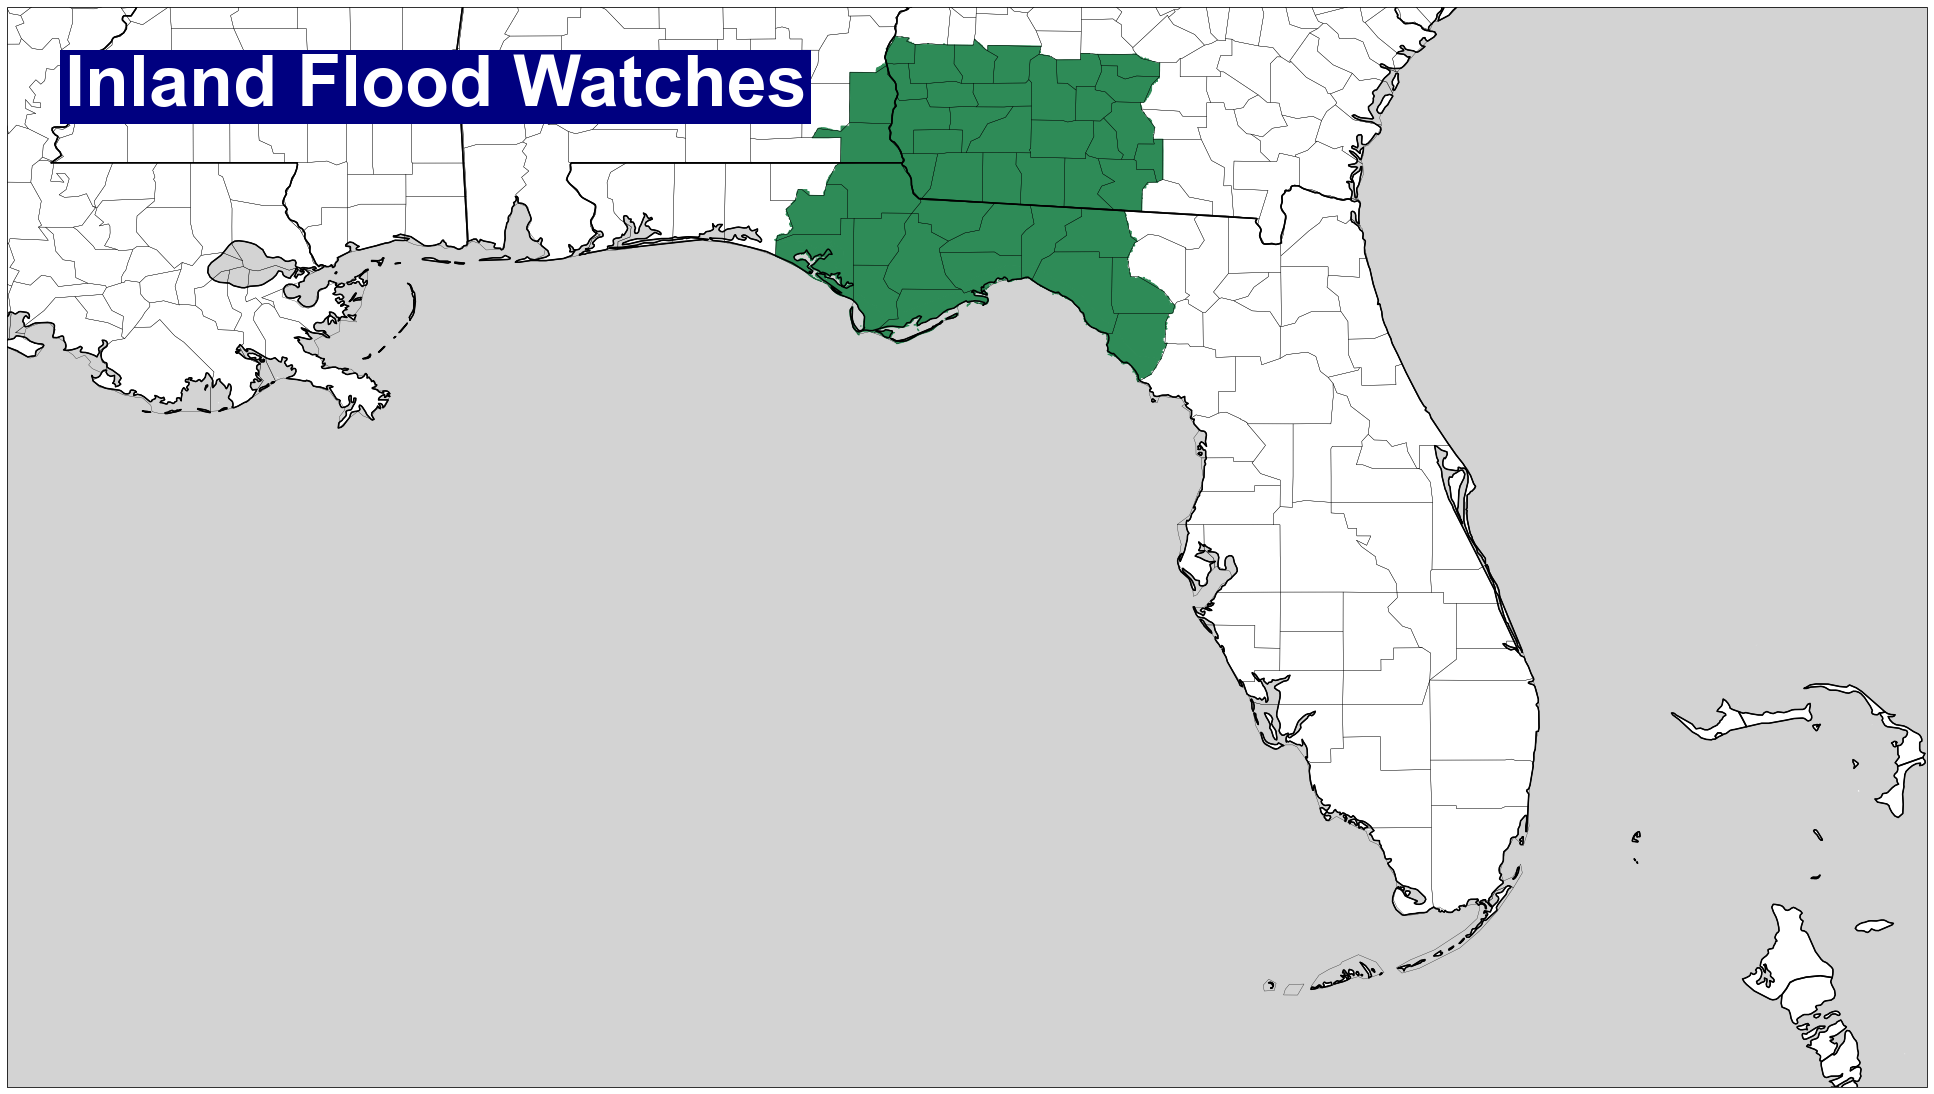

In [10]:
# Setup matplotlib figure
fig = plt.figure(figsize=(1920/72, 1080/72))
ax = fig.add_axes([0, 0, 1, 1], projection=data_crs)

ax.set_extent([-89, -75, 23, 37], data_crs)
ax.set_adjustable('datalim')

#FL
ax.set_extent([-92, -77, 24.5, 31.5], ccrs.PlateCarree())
#ax.set_extent([-89, -80, 28.5, 31.5], ccrs.PlateCarree())


#SC
#ax.set_extent([-85, -78, 31.5, 35.5], ccrs.PlateCarree())

# Setup borders (states, countries, coastlines, etc)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax.add_feature(cfeature.OCEAN.with_scale('10m'), color='lightgray')
ax.add_feature(USCOUNTIES.with_scale('20m'), edgecolor='black', zorder=5, linewidth=0.3)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=1.5, zorder=5)

for key in warning_cmap.keys():
    geometries = hazards[hazards['PROD_TYPE'] == key]
    ax.add_geometries(geometries['geometry'], crs=data_crs, facecolor=warning_cmap[key],
                      edgecolor=warning_cmap[key], linewidth=1, zorder=1, alpha=1.0)

# Set title
ax.set_title(f'Inland Flood Watches', loc='left', 
             ha='left', va='top', fontsize=72, color='white', 
             fontweight='bold', fontname='Arial', y=0.95, x=0.03, zorder=11,
             bbox=dict(facecolor='navy', alpha=1.0, edgecolor='none'))

graphics_dir = Path('.') / '..' / '..' / 'graphics' / 'hazards'
plt.savefig(f'{graphics_dir}/flood_inland.png', dpi=72)